In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

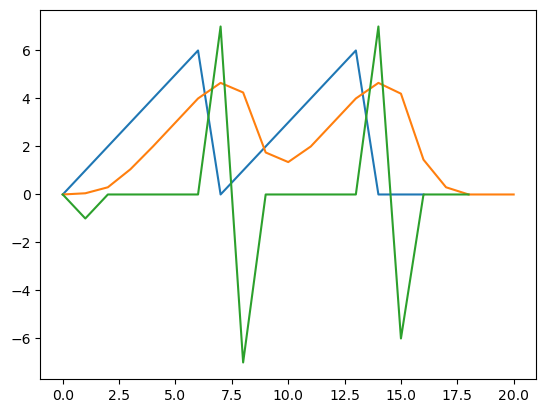

In [3]:
X = [0,1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05,0.2,0.5,0.2,0.05]
H_H = [-1,2,-1]
y_low = np.convolve(X,H_L)
y_high = np.convolve(X,H_H)
plt.plot(X)
plt.plot(y_low)
plt.plot(y_high)

In [5]:
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray
im = imread("C:/Users/srich/Desktop/project_newday/year3/NNDL/nndlCodes/Neural.JPG")
img = rgb2gray(im)*255

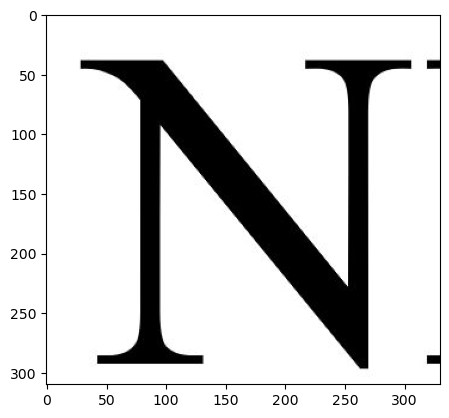

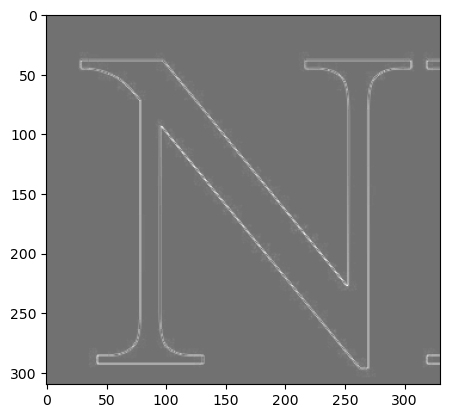

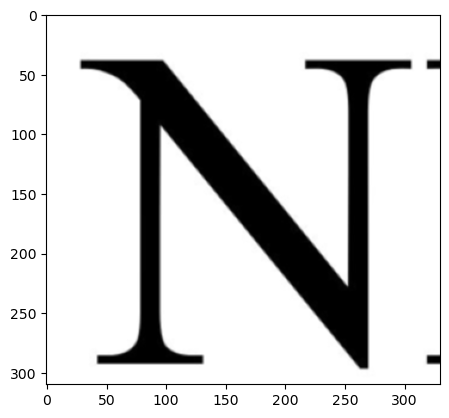

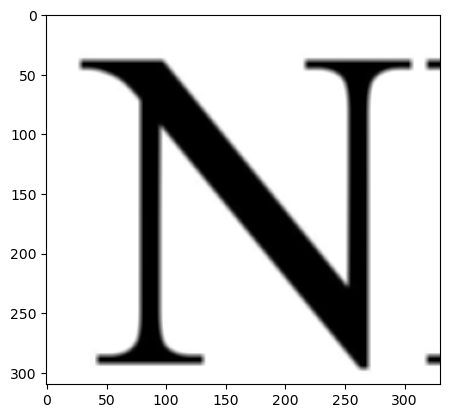

In [7]:
plt.imshow(img, cmap='gray')
img1 = img[40:350,20:350]
plt.imshow(img1,cmap='gray')
plt.show()
fil1 = np.array([[ 0, -1, 0],
 [-1, 4, -1],
 [ 0, -1, 0]])
fil2 = np.array([[ 0.2, 0.5, 0.2],
 [0.5, 1, 0.5],
 [0.2, 0.5, 0.2]])
fil3 = np.array([[ 0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1],
 [0.1,0.1,0.1, 0.1, 0.1]])
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')
plt.imshow(abs(grad1),cmap='gray',vmin=np.min(grad1),vmax = np.max(grad1)
)
plt.show()
plt.imshow(grad2,cmap='gray')
plt.show()
plt.imshow(grad3,cmap='gray')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tf-gpu as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 🔹 Step 1: Load Data
file_path = "Custom_CNN_Features.csv"  # Ensure the file exists in the working directory
df = pd.read_csv(file_path)

# 🔹 Step 2: Preprocess Data
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Step 3: Define Neural Network Model
model = Sequential([
    Dense(128, activation="relu", input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(3, activation="softmax")  # Assuming 3-class classification
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 🔹 Step 4: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

# 🔹 Step 5: Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss vs Validation Loss")
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


ModuleNotFoundError: No module named 'tensorflow'